[](https://mindfultravelbysara.com/wp-content/uploads/2019/08/things-to-do-in-jeddah-1200x900.jpg)


# [Saudi Arabia Real Estate](https://www.kaggle.com/lama122/saudi-arabia-real-estate-aqar)



<img src="https://www.arabianbusiness.com/cloud/2021/10/29/ZKjJbtLF-Saudi-Arabia-1.jpg" alt="Drawing" style="width: 800px;"/>

#### Rental house dataset in 4 of the largest cities in Saudi Arabia

The dataset contains 3718 records and 24 columns about the price of rental houses and it's features in Riyadh, Jeddah, Dammam, and Alkhobar.
The dataset is collected and scrapped from [Aqar website](https://sa.aqar.fm).

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import io
from PIL import Image

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn import tree

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [99]:
# Read the data in the CSV file using pandas.
df = pd.read_csv('SA_Real_Estate.csv')
# returns the first 5 rows of the df.
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,Riyadh,Al-Arid,North,250,0,5,5,1,1,1,...,0,0,0,1,0,1,1,0,0,80000
1,Riyadh,Al-Qadisiyah,South,370,0,4,5,2,1,1,...,0,0,0,1,0,0,1,0,0,60000
2,Riyadh,Al-Qadisiyah,South,380,0,4,5,1,1,1,...,0,1,0,1,0,0,1,0,0,60000
3,Riyadh,Al-Maizala,West,250,0,5,5,3,0,1,...,0,0,0,1,0,0,0,0,0,55000
4,Riyadh,Al Alia,West,400,11,7,5,2,1,1,...,0,1,0,1,0,1,1,0,0,70000


In [100]:
# see number of rows and number of columns in the DataFrame,
# (rows, columns).

df.shape

(3718, 23)

In [101]:
# prints information about the DataFrame.
""" The information contains the number of columns,
column labels, column data types, memory usage,
range index, and the number of cells in each column (non-null values). """

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [102]:
# returns the number of missing values in the dataset.
df.isnull().any().sum()

0

In [103]:
# returns description of the numerical data in the DataFrame.
df.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [104]:
# returns description of the string data in the DataFrame
df.describe(include=[object])

,city,district,front
count,3718,3718,3718
unique,4,192,10
top,Khobar,Al Yaqoot,North
freq,976,177,917


## Remove Outliers

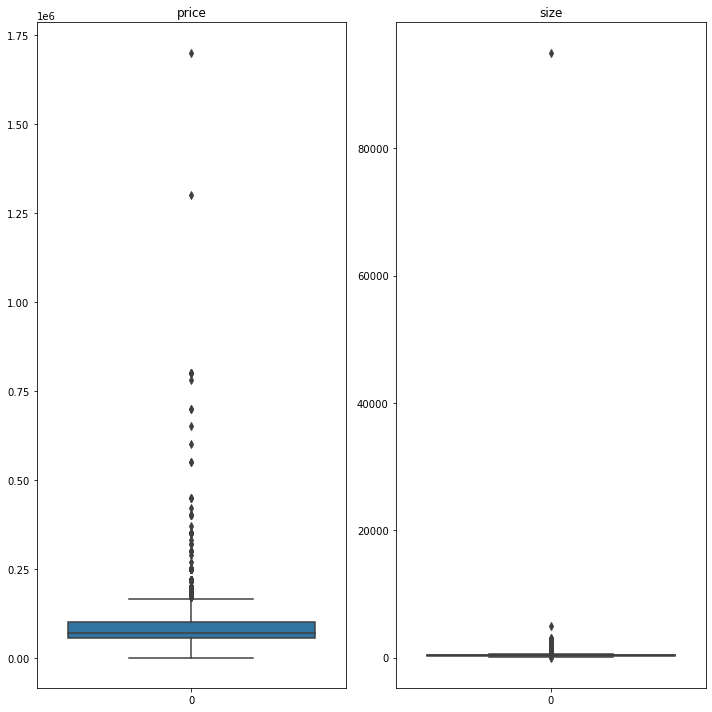

In [105]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['price'])

plt.title('price')

plt.subplot(1, 2, 2)
sns.boxplot(data=df['size'])

plt.title('size');

In [106]:
q_hi  = df["price"].quantile(0.99)

df3 = df[(df["price"] < 500000) & (df["size"] < 90000)]

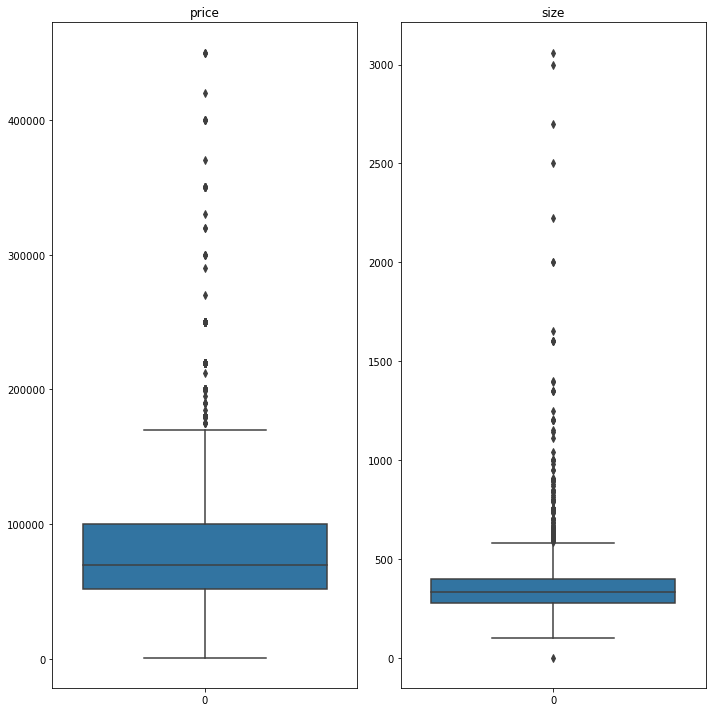

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df3['price'])

plt.title('price')

plt.subplot(1, 2, 2)
sns.boxplot(data=df3['size'])

plt.title('size');

## Data insights

#### Average Real Estate Prices by Cities

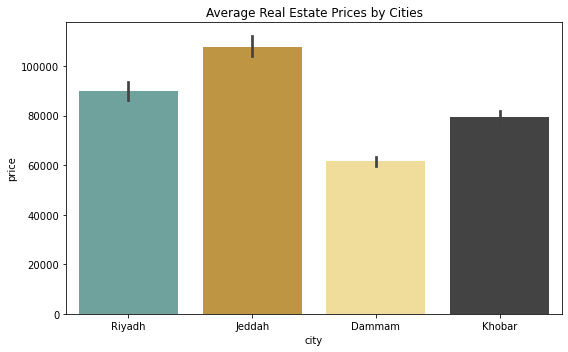

In [108]:
plt.figure(figsize=(8,5))
mycolors = ['#66aaa2', '#D39C2E', '#FFE48D', '#434343']
sns.barplot(x='city' , y='price' , data=df3 , palette = mycolors)
plt.title("Average Real Estate Prices by Cities");

##### Description:
This plot shows the average price of real estate for cities and
shows the highest average house rent price in Jeddah, which is 112,881 SRA,
and the lowest average price for renting a house in Dammam, and the average price is 63,283 SRA

#### price per property age

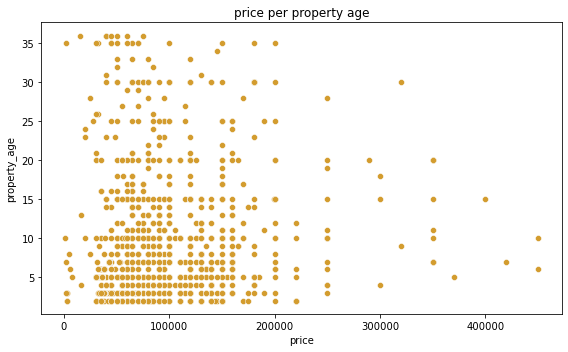

In [109]:
dfg = df3[df3['property_age'] != 0]
plt.figure(figsize=(8,5))
sns.scatterplot(x= "price", y= "property_age" , data=dfg , color = '#D39C2E')
plt.title("price per property age");

##### Description:
This plot shows the property age is slightly affects the price, as some modern rented houses show an increase in prices of up to 450,000SR compared to the old houses where the highest price reaches about 200,000SR

#### price per the size

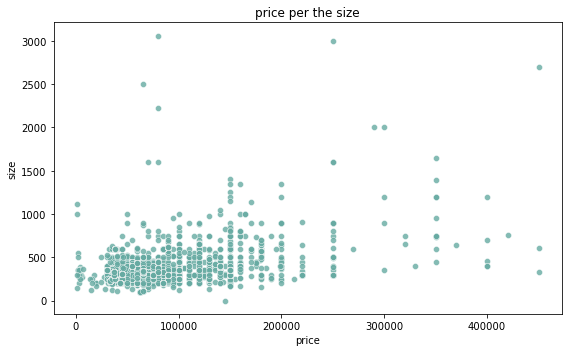

In [110]:
# scatter plot for price per size
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="price", 
    y="size", 
    alpha=.8, 
    color = '#66aaa2',
    #sizes=(20,200),
    data=df3
)

plt.title("price per the size");

##### Description:
The graph shows that the price is significantly affected by the size of the property, as the greater the size of the property, the higher its price, most of small properties their prices do not exceed 250,000 RS.


#### average price for the house front

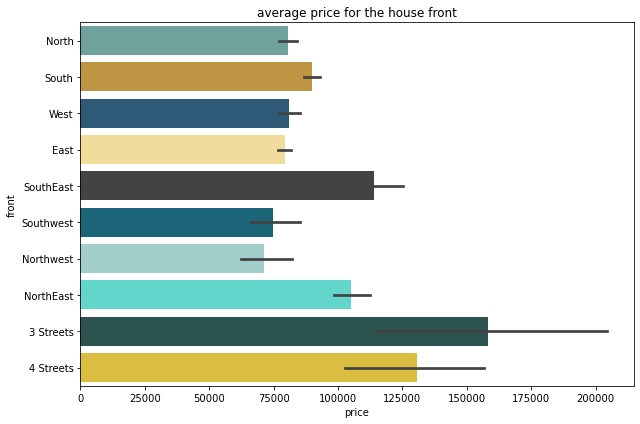

In [111]:
plt.figure(figsize=(9,6))
mycolors = ['#66aaa2', '#D39C2E','#225C84', '#FFE48D', '#434343', '#0d6c87' , '#9ad7d2', '#4FE9D9', '#275954','#F5CC28' ]
sns.barplot(x=df3['price'], y=df3['front'].fillna(np.inf), palette = mycolors )
plt.title("average price for the house front");

##### Description:
This plot shows the average price of houses in relation to the front of the house, the highest average price of houses between 3 streets at 259347 SR, and the lowest average price of houses with a northwestern front, with an average price of 71277 SR.

#### plot title

In [112]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dc = df3[['city', 'district', 'price']]
b = dc.groupby(['city', 'district'], as_index=False)['price'].mean()
c = pd.DataFrame(b)

dr = c.loc[(c['city'].isin(['Riyadh']))]
dk = c.loc[(c['city'].isin(['Khobar']))]
dd = c.loc[(c['city'].isin(['Dammam']))]
dj = c.loc[(c['city'].isin(['Jeddah']))]

dr1 = dr.nlargest(5, ['price'])
dd1 = dd.nlargest(5, ['price'])
dk1 = dk.nlargest(5, ['price'])
dj1 = dj.nlargest(5, ['price'])

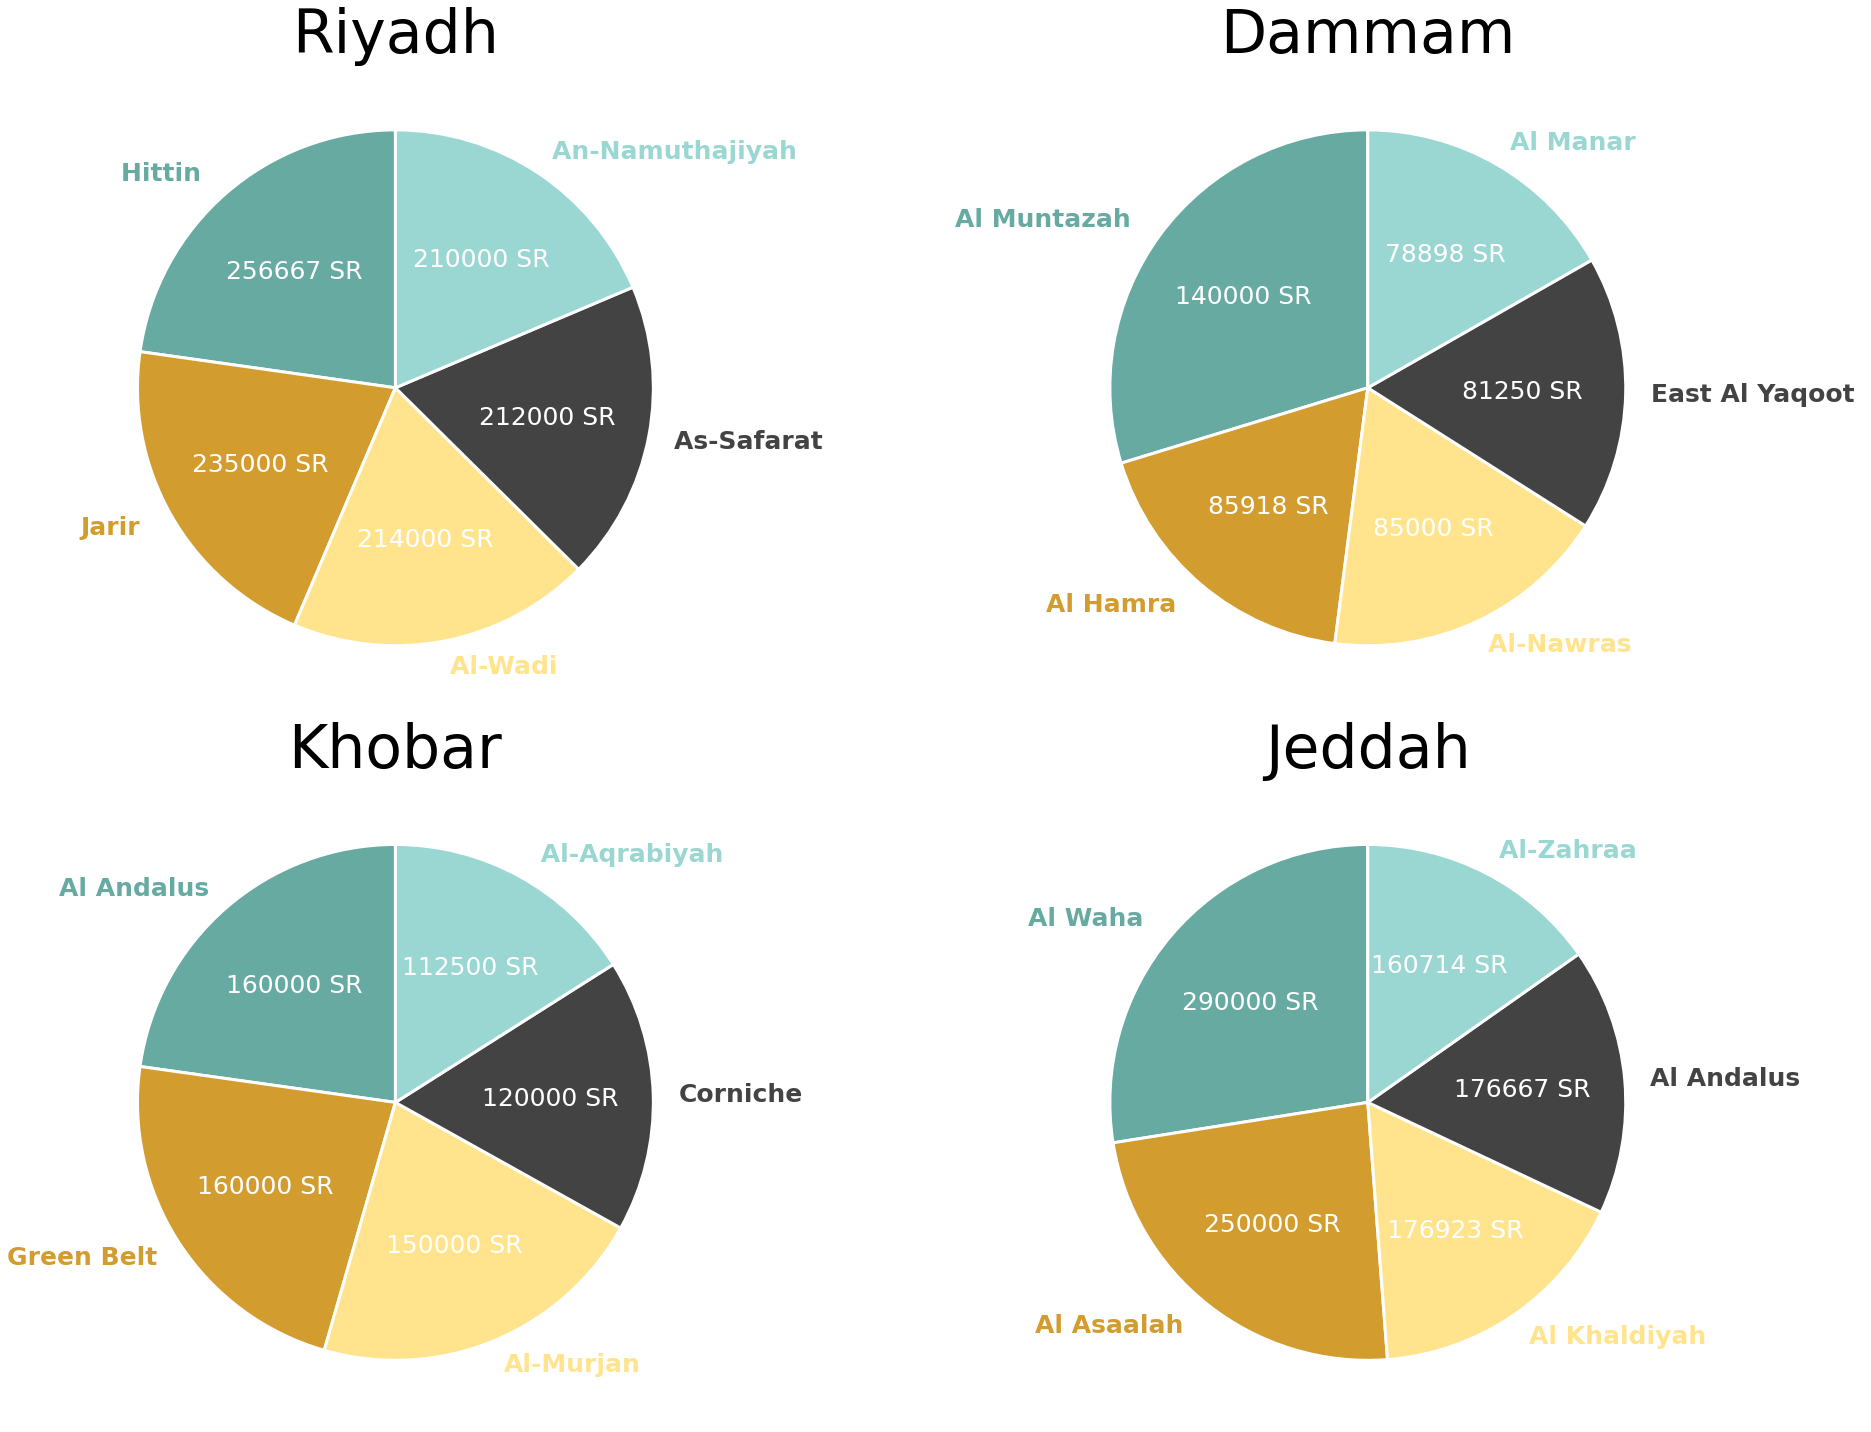

In [119]:
plt.figure(figsize=(30,20))

mycolors = ['#66aaa2', '#D39C2E', '#FFE48D', '#434343', '#9ad7d2']

plt.subplot(2, 2, 1)
total = sum(dr1['price'].values)
patches, texts, pcts = plt.pie(
    dr1['price'], labels=dr1['district'], autopct= lambda p: '{:.0f} SR'.format(p * total / 100),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 25},
    colors = mycolors,
    startangle=90 )

for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.title('Riyadh', fontsize=60)


plt.subplot(2, 2, 2)
total = sum(dd1['price'].values)
patches, texts, pcts = plt.pie(
    dd1['price'], labels=dd1['district'], autopct= lambda p: '{:.0f} SR'.format(p * total / 100),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 25},
    colors = mycolors,
    startangle=90 )

for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.title('Dammam', fontsize=60)


plt.subplot(2, 2, 3) 
total = sum(dk1['price'].values)
patches, texts, pcts = plt.pie(
    dk1['price'], labels=dk1['district'], autopct= lambda p: '{:.0f} SR'.format(p * total / 100),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 25},
    colors = mycolors,
    startangle=90 )

for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())
        
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.title('Khobar', fontsize=60)



plt.subplot(2, 2, 4) 
total = sum(dj1['price'].values)
patches, texts, pcts = plt.pie(
    dj1['price'], labels=dj1['district'], autopct= lambda p: '{:.0f} SR'.format(p * total / 100),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 25},
    colors = mycolors,
    startangle=90)

for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.title('Jeddah', fontsize=60)


plt.tight_layout() 
plt.show();

##### Description:

The plot shows the 5 most expensive district by the main cities in saudi arabia, hittin got the highest average price with 256667 in riyadh, while jarir the 2nd highest average price with 235000, and An Namudhajiyah the last highest average price with 214000.

al muntazah got the highest average price with 140000 in dammam, and al hammra got 2nd highest average price with 85918, last highest average price with 78898 for al manar.

in jeddah the highest average price district is 290000 for al waha, while al asaalah got the 2nd highest average price with 250000, and last highest average price with 176667 for al andalus.

for khobar al andalus and the green belt district
got the highest average price with 160000, while al murjan got the 2nd highest average price with 150000, and last highest average price with 120000 for corniche.

#### Effect of some Criteria on the Price

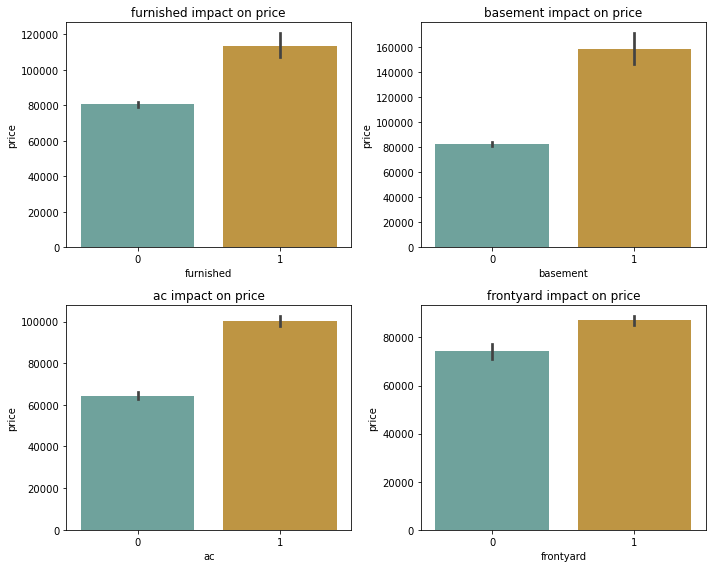

In [27]:
plt.figure(figsize=(10,8))

#plot 1:

plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
g = sns.barplot(
    data=df3, # Data
    x="furnished", # X axis
    y="price", # y axis
    palette = ['#66aaa2', '#D39C2E']
)

#g.legend(bbox_to_anchor=(1,1))

plt.title("furnished impact on price");

#plot 2:
# Create some fake data
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
s = sns.barplot(
    data=df3, # Data
    x="basement", # X axis
    y="price", # y axis
    palette = ['#66aaa2', '#D39C2E']
)
#g.legend(bbox_to_anchor=(1,1))

plt.title("basement impact on price");

plt.subplot(2, 2, 3) # 2x2 plot with plot position 2 (upper right)
s = sns.barplot(
    data=df3, # Data
    x="ac", # X axis
    y="price", # y axis
    palette = ['#66aaa2', '#D39C2E']
)
#g.legend(bbox_to_anchor=(1,1))

plt.title("ac impact on price");

plt.subplot(2, 2, 4) # 2x2 plot with plot position 2 (upper right)
s = sns.barplot(
    data=df3, # Data
    x="frontyard", # X axis
    y="price", # y axis
    palette = ['#66aaa2', '#D39C2E']
)
#g.legend(bbox_to_anchor=(1,1))

plt.title("frontyard impact on price");

plt.tight_layout() 



##### Description:
This subplot shows the effect of some criteria on the price, such as whether the house is furnished or not, or if it has a front yard, air conditioners, or basement.

### ML preprocessing

In [28]:
# Convert categorical variable into dummy/indicator variables.
df1 = pd.get_dummies(df, columns = ['city'])
df1.head()

,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,...,basement,duplex,stairs,elevator,fireplace,price,city_ Dammam,city_ Jeddah,city_ Khobar,city_ Riyadh
0,Al-Arid,North,250,0,5,5,1,1,1,0,...,0,1,1,0,0,80000,0,0,0,1
1,Al-Qadisiyah,South,370,0,4,5,2,1,1,0,...,0,0,1,0,0,60000,0,0,0,1
2,Al-Qadisiyah,South,380,0,4,5,1,1,1,1,...,0,0,1,0,0,60000,0,0,0,1
3,Al-Maizala,West,250,0,5,5,3,0,1,1,...,0,0,0,0,0,55000,0,0,0,1
4,Al Alia,West,400,11,7,5,2,1,1,1,...,0,1,1,0,0,70000,0,0,0,1


### Before Removing the Outliers

In [29]:
# Split the dataset into feature set and target column 

x_columns = ['price', 'district', 'front']
X = df1.drop(columns = x_columns)
y = df1['price']

In [30]:
#X = df.iloc[:, [2,4,9,12]]
#y = df.iloc[:, -5]
#X

### Split the Data set

In [31]:
# Split the dataset into train and test subsets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)


#### Linear Regression Model

In [32]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

preds_lin = reg_lin.predict(X_test)

print(f"Model Score: {reg_lin.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred = preds_lin)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=preds_lin)}\n\n')

Model Score: 0.27518391528399866
Mean Square Error: 0.27518391528399866
Mean Absolute Error: 30062.880270056452




#### Standard Scaleing the Data set

In [33]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Linear Regression Model after Scaleing

In [34]:
reg_lins = LinearRegression()
reg_lins.fit(X_train_sc, y_train)

preds_lins = reg_lins.predict(X_test_sc)

print(f"Model Score: {reg_lins.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred = preds_lins)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=preds_lins)}\n\n')

Model Score: -277.94890771105054
Mean Square Error: 0.27518391528399844
Mean Absolute Error: 30062.880270056456




#### Decision Trees For Regression (baseline model)

In [35]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')
reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)

print(f"Model Score: {reg_tree.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred = preds_tree)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=preds_tree)}\n\n')

Model Score: 0.058528081804321674
Mean Square Error: 0.058528081804321674
Mean Absolute Error: 31660.457141724153




#### Random Forest Regressor

In [36]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)

print(f"Model Score: {reg_forest.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred = preds_forest)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=preds_forest)}\n\n')

Model Score: 0.14294994158382734
Mean Square Error: 0.14294994158382734
Mean Absolute Error: 18239.235439068103




In [37]:
reg_forest.feature_importances_

array([0.33114145, 0.0964036 , 0.05963169, 0.02691546, 0.05108154,
       0.0073186 , 0.00701275, 0.0819331 , 0.02629074, 0.03123504,
       0.04949612, 0.01827224, 0.03799663, 0.01641657, 0.01909168,
       0.01995775, 0.01727185, 0.02545363, 0.02645822, 0.01209072,
       0.02376586, 0.00441468, 0.01035008])

In [38]:
X_train.columns

Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace', 'city_ Dammam', 'city_ Jeddah', 'city_ Khobar',
       'city_ Riyadh'],
      dtype='object')

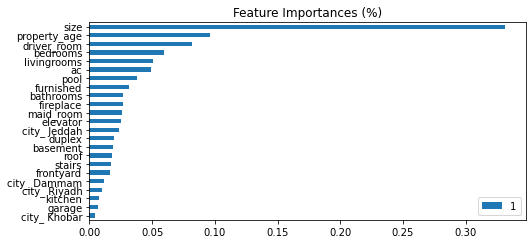

In [39]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

#### Calculating percentage prediction error of Random Forest Regressor 

In [40]:
test_dataset = pd.DataFrame(X_test, columns= ['size'])

test_dataset['Actual_price'] = y_test.to_numpy()
test_dataset['Predict_price'] = preds_forest
test_dataset['perce_pred error'] =np.abs(((test_dataset['Actual_price'] - test_dataset['Predict_price']) / (test_dataset['Actual_price'])) * 100)


test_dataset.style.format("{:.1f}")
test_dataset

,size,Actual_price,Predict_price,perce_pred error
3616,200,43000,43000.0,0.000000
3615,350,150000,150000.0,0.000000
1492,100,62000,62000.0,0.000000
142,260,100000,126700.0,26.700000
137,300,220000,111500.0,49.318182
...,...,...,...,...
1630,375,100000,100000.0,0.000000
1398,350,45000,45000.0,0.000000
307,270,6000,32600.0,443.333333
1286,400,140000,149000.0,6.428571


In [41]:
print("the predectid more than actual:",(test_dataset['Actual_price'] < test_dataset['Predict_price']).sum())
print("the actual more than predectid:",(test_dataset['Actual_price'] > test_dataset['Predict_price']).sum())
print("the actual equal predectid:",(test_dataset['Actual_price'] == test_dataset['Predict_price']).sum())

the predectid more than actual: 164
the actual more than predectid: 131
the actual equal predectid: 449


In [42]:
test_dataset4 = pd.DataFrame()

test_dataset4['20% difference'] = test_dataset[(test_dataset['perce_pred error'] > 20)].shape
test_dataset4['40% difference'] = test_dataset[(test_dataset['perce_pred error'] > 40)].shape
test_dataset4['80% difference'] = test_dataset[(test_dataset['perce_pred error'] > 80)].shape

test_dataset4.head(1)

,20% difference,40% difference,80% difference
0,184,109,42


#### Regression using XGBoost

In [43]:
df_train = xgb.DMatrix(data=X_train, label=y_train)
df_test = xgb.DMatrix(data=X_test, label=y_test)
params = {"booster": "gblinear", "objective": "reg:linear"}
xg_reg = xgb.train(params=params, dtrain=df_train, num_boost_round=5)
# Making predictions
predictions = xg_reg.predict(df_test)

#print(f"Model Score: {xg_reg.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred=predictions)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=predictions)}\n\n')

[19:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean Square Error: 0.26149773356141626
Mean Absolute Error: 31275.195475260418




#### Support Vector Regression 

In [44]:
reg_svr = SVR(kernel = 'rbf')
reg_svr.fit(X_train, y_train)
preds_svr = reg_svr.predict(X_test)

print(f"Model Score: {reg_svr.score(X_test, y_test)}")
print(f'Mean Square Error: {r2_score(y_true=y_test, y_pred=preds_svr)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=preds_svr)}\n\n')

Model Score: -0.08807262141085648
Mean Square Error: -0.08807262141085648
Mean Absolute Error: 37403.02636807508




### After Removing the Outliers

In [45]:
q_hi  = df["price"].quantile(0.99)

df4 = df[(df["price"] < q_hi) & (df["size"] < 1500)]
df4.shape

(3667, 23)

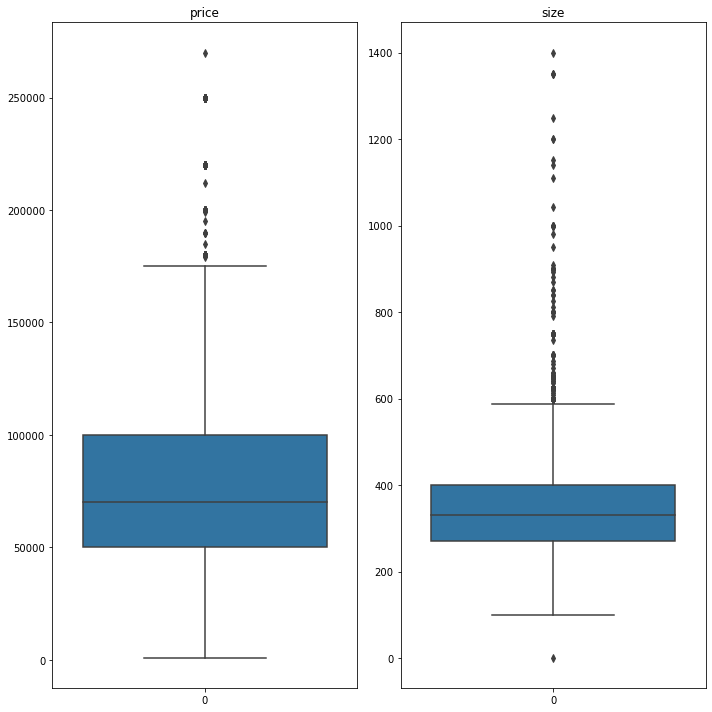

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df4['price'])

plt.title('price')

plt.subplot(1, 2, 2)
sns.boxplot(data=df4['size'])

plt.title('size');

In [47]:
x_columns = ['price', 'district', 'front']
df4 = pd.get_dummies(df4, columns = ['city'])
X3 = df4.drop(columns = x_columns)
y3 = df4['price']

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.20, random_state = 2)

#### Decision Trees For Regression

In [48]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')
reg_tree.fit(X3_train, y3_train)

preds_tree3 = reg_tree.predict(X3_test)

print(f"Model Score: {reg_tree.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=preds_tree3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=preds_tree3)}\n\n')

Model Score: 0.5519605485846275
Mean Square Error: 0.5519605485846275
Mean Absolute Error: 20745.555403220675




#### Random Forest Regressor

In [49]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X3_train, y3_train)

preds_forest3 = reg_forest.predict(X3_test)

print(f"Model Score: {reg_forest.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=preds_forest3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=preds_forest3)}\n\n')

Model Score: 0.7255733975215941
Mean Square Error: 0.7255733975215941
Mean Absolute Error: 10328.286120044919




#### Support Vector Regression 

In [50]:
reg_svr = SVR(kernel = 'rbf')
reg_svr.fit(X3_train, y3_train)
preds_svr3 = reg_svr.predict(X3_test)

print(f"Model Score: {reg_svr.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=preds_svr3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=preds_svr3)}\n\n')

Model Score: -0.0741851574058856
Mean Square Error: -0.0741851574058856
Mean Absolute Error: 32634.689597624016




#### Regression using XGBoost

In [51]:
# Convert the training and testing sets into DMatrixes
df_train3 = xgb.DMatrix(data=X3_train, label=y3_train)
df_test3 = xgb.DMatrix(data=X3_test, label=y3_test)
params = {"booster": "gblinear", "objective": "reg:linear"}
xg_reg3 = xgb.train(params=params, dtrain=df_train3, num_boost_round=5)
predictions3 = xg_reg.predict(df_test3)

print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=predictions3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=predictions3)}\n\n')

[19:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean Square Error: 0.32057499658759947
Mean Absolute Error: 28050.13638347241




## Hyperparameter tuning

#### Hyperparameter tuning for  Decision Trees For Regression

In [52]:
param_grid3 = {
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}

grid3 = GridSearchCV(
    reg_tree,
    param_grid3,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid3.fit(X3_train, y3_train)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=4, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [54]:
grid3.best_params_

{'max_depth': 11, 'max_leaf_nodes': None, 'min_samples_leaf': 4}

#### Hyperparameter tuning for Random Forest Regressor

In [55]:
param_grid2 = {
    "n_estimators": [5,6,10, 50, 100], 
    "max_depth": [2,4,6, 50, 53, 100]
    
}

grid2 = GridSearchCV(
    reg_forest,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X3_train, y3_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 50, 53, 100],
                         'n_estimators': [5, 6, 10, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
grid2.best_params_

{'max_depth': 50, 'n_estimators': 100}

#### Hyperparameter tuning for Support Vector Regression 

In [57]:
param_grid={
            'C': [1.1, 5.4, 170, 1001],
            'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14],
            'gamma': [0.7001, 0.008, 0.001]
        }


grid = GridSearchCV(

        SVR(kernel='rbf'),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        verbose=0,
        n_jobs=-1)

grid.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.1, 5.4, 170, 1001],
                         'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14],
                         'gamma': [0.7001, 0.008, 0.001]},
             scoring='neg_mean_absolute_error')

In [58]:
grid.best_params_

{'C': 1001, 'epsilon': 0.0003, 'gamma': 0.7001}

## Models After Hyperparameter tuning

#### Decision Trees For Regression After Hyperparameter tuning

In [59]:
tun_reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 11, criterion= 'mse', min_samples_leaf= 6)
tun_reg_tree.fit(X3_train, y3_train)

tun_preds_tree3 = tun_reg_tree.predict(X3_test)

print(f"Model Score: {tun_reg_tree.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=tun_preds_tree3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=tun_preds_tree3)}\n\n')


Model Score: 0.6723562608592639
Mean Square Error: 0.6723562608592639
Mean Absolute Error: 12710.945899856031




#### Random Forest Regressor After Hyperparameter tuning

In [60]:
tun_reg_forest = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 53, criterion = 'mse')
tun_reg_forest.fit(X3_train, y3_train)

tun_preds_forest3 = tun_reg_forest.predict(X3_test)

print(f"Model Score: {tun_reg_forest.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=tun_preds_forest3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=tun_preds_forest3)}\n\n')

Model Score: 0.7401637030315413
Mean Square Error: 0.7401637030315413
Mean Absolute Error: 9891.369374101845




#### Support Vector Regression After Hyperparameter tuning

In [61]:
tun_reg_svr = SVR(kernel = 'rbf', C = 1001, epsilon = 0.0003, gamma = 0.7001)
tun_reg_svr.fit(X3_train, y3_train)
tun_preds_svr3 = tun_reg_svr.predict(X3_test)

print(f"Model Score: {tun_reg_svr.score(X3_test, y3_test)}")
print(f'Mean Square Error: {r2_score(y_true=y3_test, y_pred=tun_preds_svr3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y3_test, y_pred=tun_preds_svr3)}\n\n')

Model Score: 0.29286120402553584
Mean Square Error: 0.29286120402553584
Mean Absolute Error: 20506.06898545354




## Models Results comparison

In [62]:
def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,2)}')
    print(f'Mean Absolute Error: {round(mae,2)}\n\n')

### Before Removing The Outliers

In [65]:
model_name = ['Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost']
model_pred = [preds_tree, preds_forest, preds_svr, predictions]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

Cost functions for the Decision Tree regression is:
Mean Square Error: 3563501985.16
Mean Absolute Error: 31660.46


Cost functions for the Random Forest regression is:
Mean Square Error: 3243962486.32
Mean Absolute Error: 18239.24


Cost functions for the Support Vector regression is:
Mean Square Error: 4118390438.9
Mean Absolute Error: 37403.03


Cost functions for the XGBoost regression is:
Mean Square Error: 2795255218.6
Mean Absolute Error: 31275.2




### After Removing The Outliers

In [66]:
model_name = ['Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost']
model_pred = [preds_tree3, preds_forest3, preds_svr3, predictions3]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y3_test, model_pred[x] )

Cost functions for the Decision Tree regression is:
Mean Square Error: 937800126.14
Mean Absolute Error: 20745.56


Cost functions for the Random Forest regression is:
Mean Square Error: 574407681.31
Mean Absolute Error: 10328.29


Cost functions for the Support Vector regression is:
Mean Square Error: 2248397932.23
Mean Absolute Error: 32634.69


Cost functions for the XGBoost regression is:
Mean Square Error: 1422117744.08
Mean Absolute Error: 28050.14




### After Removing The Outliers and Hyperparameter tuning

In [67]:
model_name = ['Decision Tree', 'Random Forest', 'Support Vector']
model_pred = [tun_preds_tree3, tun_preds_forest3, tun_preds_svr3]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y3_test, model_pred[x] )

Cost functions for the Decision Tree regression is:
Mean Square Error: 685797509.41
Mean Absolute Error: 12710.95


Cost functions for the Random Forest regression is:
Mean Square Error: 543868427.89
Mean Absolute Error: 9891.37


Cost functions for the Support Vector regression is:
Mean Square Error: 1480126024.55
Mean Absolute Error: 20506.07




In [68]:
q_hi  = df["price"].quantile(0.99)

df5 = df[(df["price"] < q_hi) & (df["size"] < 1500)]

In [69]:
x_columns = ['price', 'district', 'front']
X1 = df5.drop(columns = x_columns)
y1 = df5['price']

In [70]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.20, random_state = 2)

In [71]:
numeric_features = X1_train.describe().columns 

numeric_features

Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace'],
      dtype='object')

In [72]:
categorical_features = X1_train.describe(exclude="number").columns

categorical_features

Index(['city'], dtype='object')

In [73]:

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)


categorical_transformer = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) 
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


Reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('Regressor', RandomForestRegressor(n_estimators = 100,
                                             random_state = 0,
                                             max_depth = 53, 
                                             criterion = 'mse'))
    ]
)

Reg.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
             

In [74]:
preds_forest1 = Reg.predict(X1_test)
print(f"Model Score: {Reg.score(X1_test, y1_test)}")
print(f'Mean Square Error: {r2_score(y_true=y1_test, y_pred=preds_forest1)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_true=y1_test, y_pred=preds_forest1)}\n\n')

Model Score: 0.7395492329909077
Mean Square Error: 0.7395492329909077
Mean Absolute Error: 9910.778774646804




#### Calculating percentage prediction error of Random Forest Regressor 

In [75]:
test_dataset8 = pd.DataFrame(X1_test, columns= ['size'])

test_dataset8['Actual_price'] = y1_test.to_numpy()
test_dataset8['Predict_price'] = preds_forest1
test_dataset8['perce_pred error'] =np.abs(((test_dataset8['Actual_price'] - test_dataset8['Predict_price']) / (test_dataset8['Actual_price'])) * 100)


test_dataset8.style.format("{:.1f}")
test_dataset8

,size,Actual_price,Predict_price,perce_pred error
1467,300,220000,220000.0,0.000000
3354,330,37000,37000.0,0.000000
3523,437,60000,60000.0,0.000000
352,276,27000,58495.0,116.648148
289,370,120000,87980.0,26.683333
...,...,...,...,...
382,325,55000,59949.0,8.998182
1501,300,220000,220000.0,0.000000
3524,400,55000,55000.0,0.000000
2101,400,70000,70000.0,0.000000


In [76]:
print("the predectid more than actual:",(test_dataset8['Actual_price'] < test_dataset8['Predict_price']).sum())
print("the actual more than predectid:",(test_dataset8['Actual_price'] > test_dataset8['Predict_price']).sum())
print("the actual equal predectid:",(test_dataset8['Actual_price'] == test_dataset8['Predict_price']).sum())

the predectid more than actual: 162
the actual more than predectid: 132
the actual equal predectid: 440


In [77]:
test_dataset9 = pd.DataFrame()

test_dataset9['20% difference'] = test_dataset8[(test_dataset8['perce_pred error'] > 20)].shape
test_dataset9['40% difference'] = test_dataset8[(test_dataset8['perce_pred error'] > 40)].shape
test_dataset9['80% difference'] = test_dataset8[(test_dataset8['perce_pred error'] > 80)].shape

test_dataset9.head(1)

,20% difference,40% difference,80% difference
0,149,82,24


In [78]:
predict_price = Reg.predict(X1)

In [79]:
df5['predict price'] = predict_price

<ipython-input-79-7a5feee81dca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['predict price'] = predict_price


In [80]:
print((df5['predict price'] == df5['price']).sum())

2204


In [81]:
df5.shape

(3667, 24)

### some plots with actual and predicted price

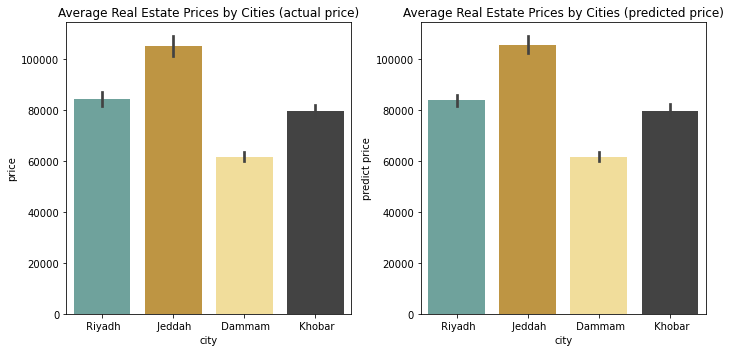

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) # 2x2 plot with plot position 1 (upper left)
sns.barplot(x='city' , y='price' , data=df5 , palette=mycolors)
plt.title("Average Real Estate Prices by Cities (actual price)");

plt.subplot(1, 2, 2) # 2x2 plot with plot position 1 (upper left)
sns.barplot(x='city' , y='predict price' , data=df5 , palette=mycolors)
plt.title("Average Real Estate Prices by Cities (predicted price)");

plt.show()

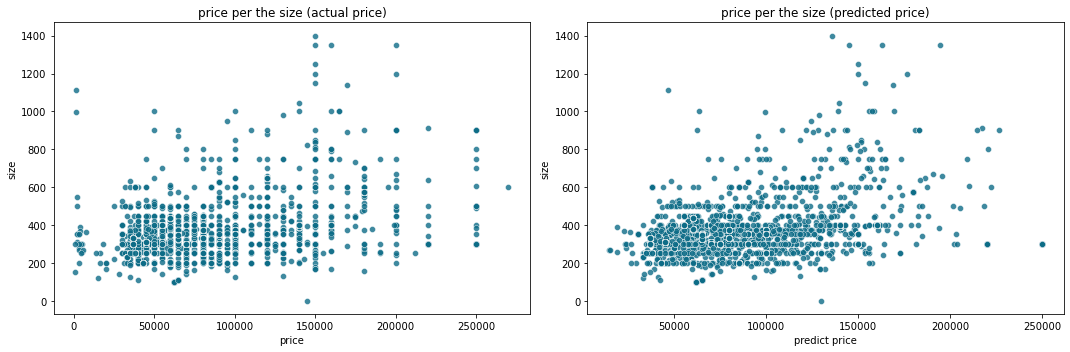

In [97]:


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # 2x2 plot with plot position 1 (upper left)
sns.scatterplot(
    x="price", 
    y="size", 
    alpha=.8, 
    color = '#0d6c87',
    #sizes=(20,200),
    data=df5
)

plt.title("price per the size (actual price)");

plt.subplot(1, 2, 2) # 2x2 plot with plot position 1 (upper left)
sns.scatterplot(
    x="predict price", 
    y="size", 
    alpha=.8, 
    color = '#0d6c87',
    #sizes=(20,200),
    data=df5
)

plt.title("price per the size (predicted price)");

plt.show()